<a href="https://colab.research.google.com/github/A-l-E-v/ML-Engineer/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание
# Тема 2. Урок 2. Matplotlib

## Инструкции для выполнения домашнего задания

1. Домашнее задание состоит из вводной части и 2 заданий
2. В вводной части вам нужно подключить необходимые библиотеки и импортировать функцию
3. В каждом задании дан фрагмент программного кода, который нужно дополнить для построения графиков
4. В каждом фрагменте программного кода даны комментарии, написанные через **#** и выделенные зеленым цветом. Комментарии или дают пояснения к строке, или объясняют, какие строки должны быть на месте пропусков, т.е. чем вы должны дополнить фрагмент программного кода до полноценной программы
5. В случае если вы забыли ранее изученные  материалы, вы всегда можете вернуться на обучающую платформу и просмотреть их заново (видео, презентация, тетрадь и т.д.), а также можете воспользоваться документацией Matplotlib

## Подготовка к выполнению домашего задания

### Импорт библиотек и функции

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

## 1. Солвер

Напишите функцию vis_solve, которая по переданным в неё функциям f1(x) и f2(x) будет рисовать их обе, а также итоговое решение в виде точки пересечения графиков. Решение будет аннотировано, причем в аннотации будет координата точки. <br>

Функция должна принимать и выдавать объект Axis, который будет изменяться в теле функции, так как нам, возможно, понадобится вернуть его для дальнейших манипуляций с ним, например, коррекции каких-то параметров осей (штрихов, подписей и др.) <br>

Также функция должна принимать сразу несколько параметров для итоговой кастомизации графика. <br> <br>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def vis_solve(ax, f1, f2, x_range, x_step=1e-3, title=None,
             colors=['r', 'b'], sol_color='g', linestyles=['-', '-'],
             labels=["first", "second"]):
    
    # Создаем сетку значений X
    X = np.arange(*x_range, step=x_step)
    y1 = list(map(f1, X))
    y2 = list(map(f2, X))
    
    # Находим решение уравнения f1(x) = f2(x)
    sol = fsolve(lambda x: f1(x) - f2(x), (x_range[1] - x_range[0])/2, xtol=x_step)
    sol_y = f1(sol[0])
    
    # Строим графики функций
    ax.plot(X, y1, color=colors[0], linestyle=linestyles[0], label=labels[0])
    ax.plot(X, y2, color=colors[1], linestyle=linestyles[1], label=labels[1])
    
    # Отмечаем точку пересечения
    ax.scatter(sol, sol_y, color=sol_color, s=100, label='Solution')
    
    # Добавляем заголовок
    if title:
        ax.set_title(title, fontsize=15)
    else:
        ax.set_title(f"Solution of the equation {labels[0]} = {labels[1]}", fontsize=15)
    
    # Добавляем аннотацию
    ax.annotate(f"solution ({sol[0]:.2f}; {sol_y:.2f})",
                xy=[sol[0], sol_y],
                xytext=(0, 30),
                textcoords="offset points",
                arrowprops={"arrowstyle": "simple"},
                fontsize=15)
    
    ax.tick_params(labelsize=15)
    ax.legend(fontsize=15)
    ax.grid(True)
    
    return ax

Используем созданную функцию (с этой функцией можно поиграть):

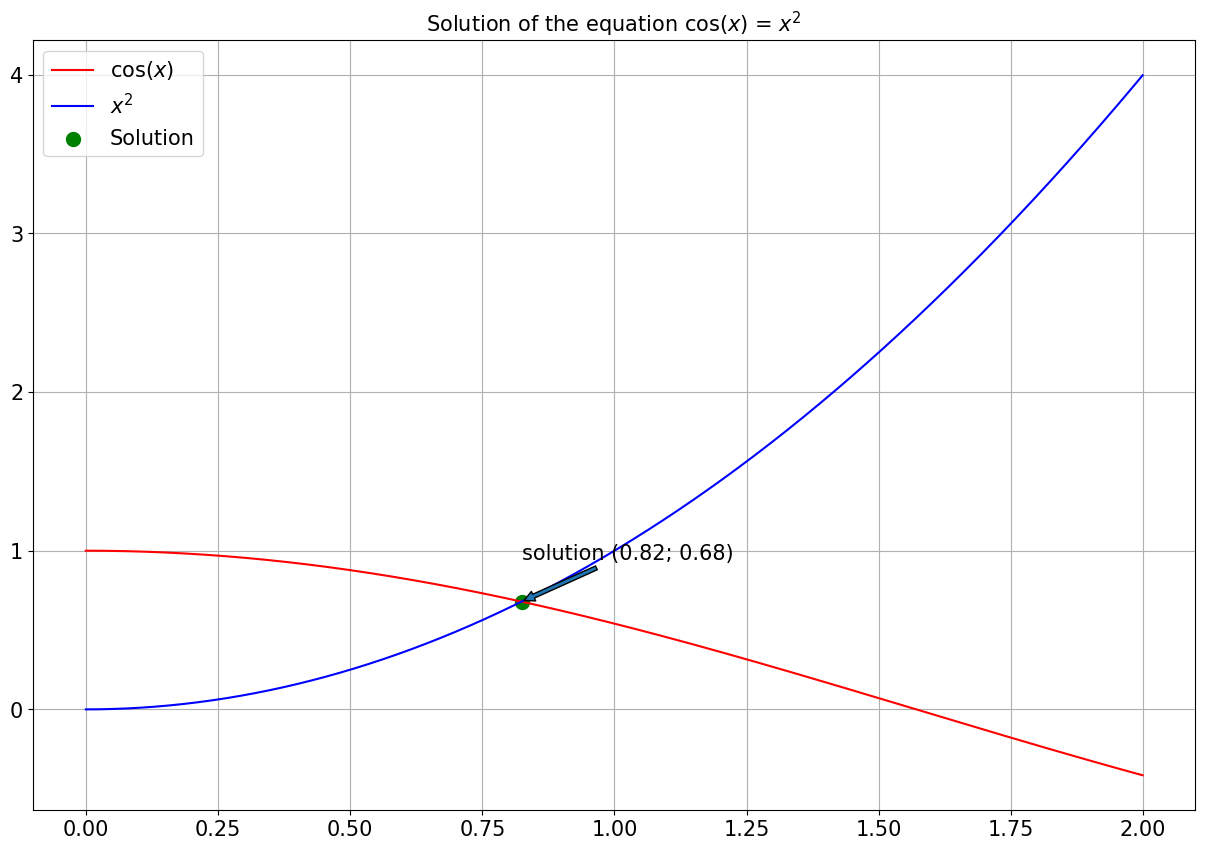

In [13]:
# Пример использования
fig, ax = plt.subplots(figsize=(15, 10))
ax = vis_solve(ax, np.cos, lambda x: x**2, (0, 2), labels=[r"$\cos(x)$", r"$x^2$"])
plt.show()

### Дополнительная информация

Для подписи некоторых графиков можно использовать $\LaTeX$-форматировние, которое хорошо работает с формулами. <br><br>
NB! Для чтения неотформатированных $\LaTeX$-примеров дважды щёлкните по ячейке <br><br>

На лекциях мы не обсуждали это, так что коротко поясню. $\LaTeX$-форматированные строчки в Python выглядят так: `r"blah blah $formula$"`, где r указывает на то, что строка будет читаться в *raw*-формате, что и нужно для использования $\LaTeX$. Текст вне знаков доллара будет выведен как обычно, а формулы должны быть обязательно заключены в эти знаки. Далее происходит их форматирование по правилам синтаксиса $\LaTeX$: например, "^" - это степень, {} - это скобки, которые означают, что мы хотим применить операцию на всё, что внутри них, так как по умолчанию операция применяется только на один символ после неё (сравните $e^x+2$ и $e^{x+2}$), любая функция или специальный символ начинается в $\LaTeX$ с "\\" (пример $\vdots$ или $\sin(x)$) <br><br>

Если есть желание разобраться подробнее, то начать можно [отсюда](https://habr.com/ru/companies/ruvds/articles/574352/) <br><br>

В matplotlib (и других библиотеках для визуализации) мы будем это использовать только для подписей графиков, осей, легенды или цветовых шкал.

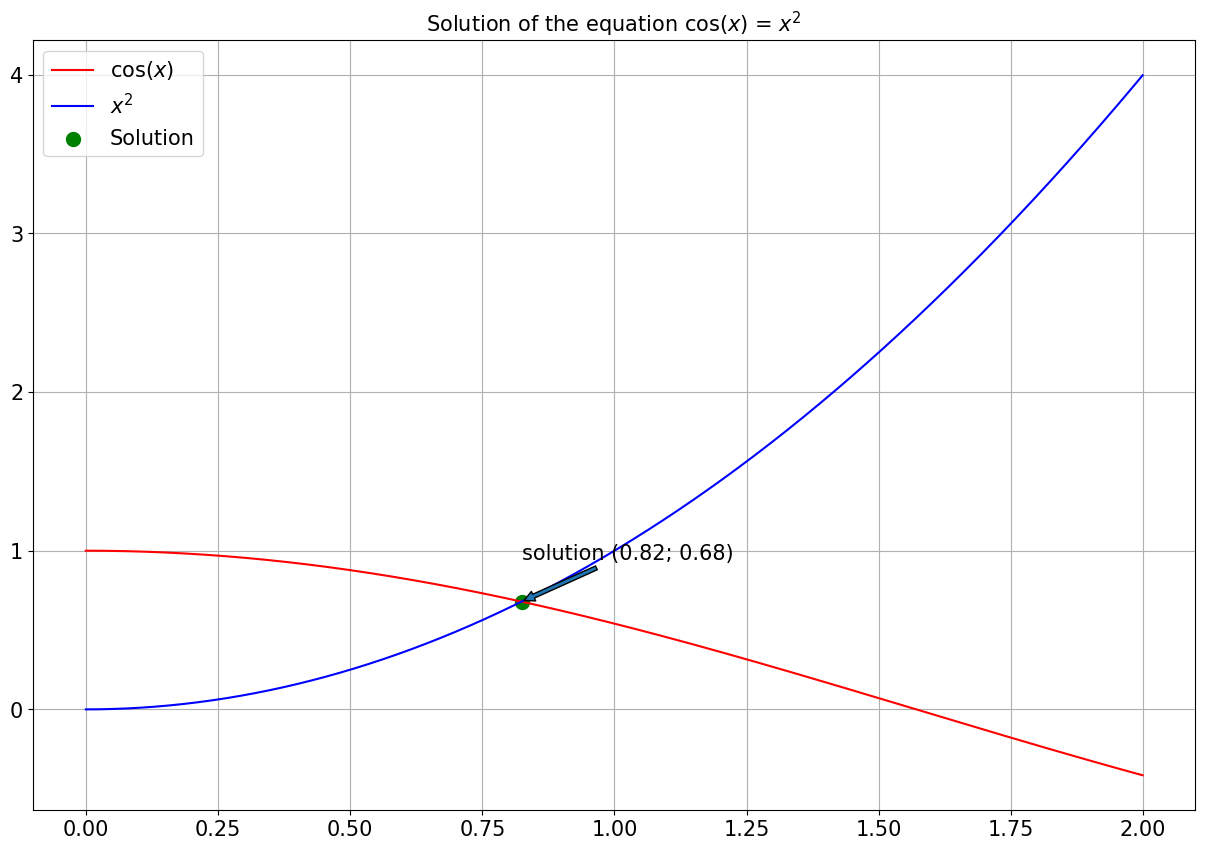

In [14]:
# используем итоговую функцию (с этой функцией можно играться)
fig, ax = plt.subplots(figsize=(15, 10))
ax = vis_solve(ax, np.cos, lambda x: x**2, (0, 2), labels=[r"$\cos(x)$", r"$x^2$"])
plt.show()

Если всё правильно сделано - выше появится график

## 2. Сводка о функциях

В этом задании мы будем пользоваться результатами предыдущего.

Есть две функции: $x^3$ и $e^{-x^2}$, составьте композицию графиков функций так, чтобы сверху отображались сами функции, а снизу - они обе и их пересечение.

Оформление:

*   Необходимый диапазон по оси Х: (-2; 2)
*   Все графики должны быть подписаны
*   На графиках должна быть легенда
*   Композиция должна быть на сиреневом фоне
*   Композиция должна быть подписана
*   После этого композицию надо будет сохранить в файл "hw1_solution.png"

**Если всё правильно, то должно получиться так:**

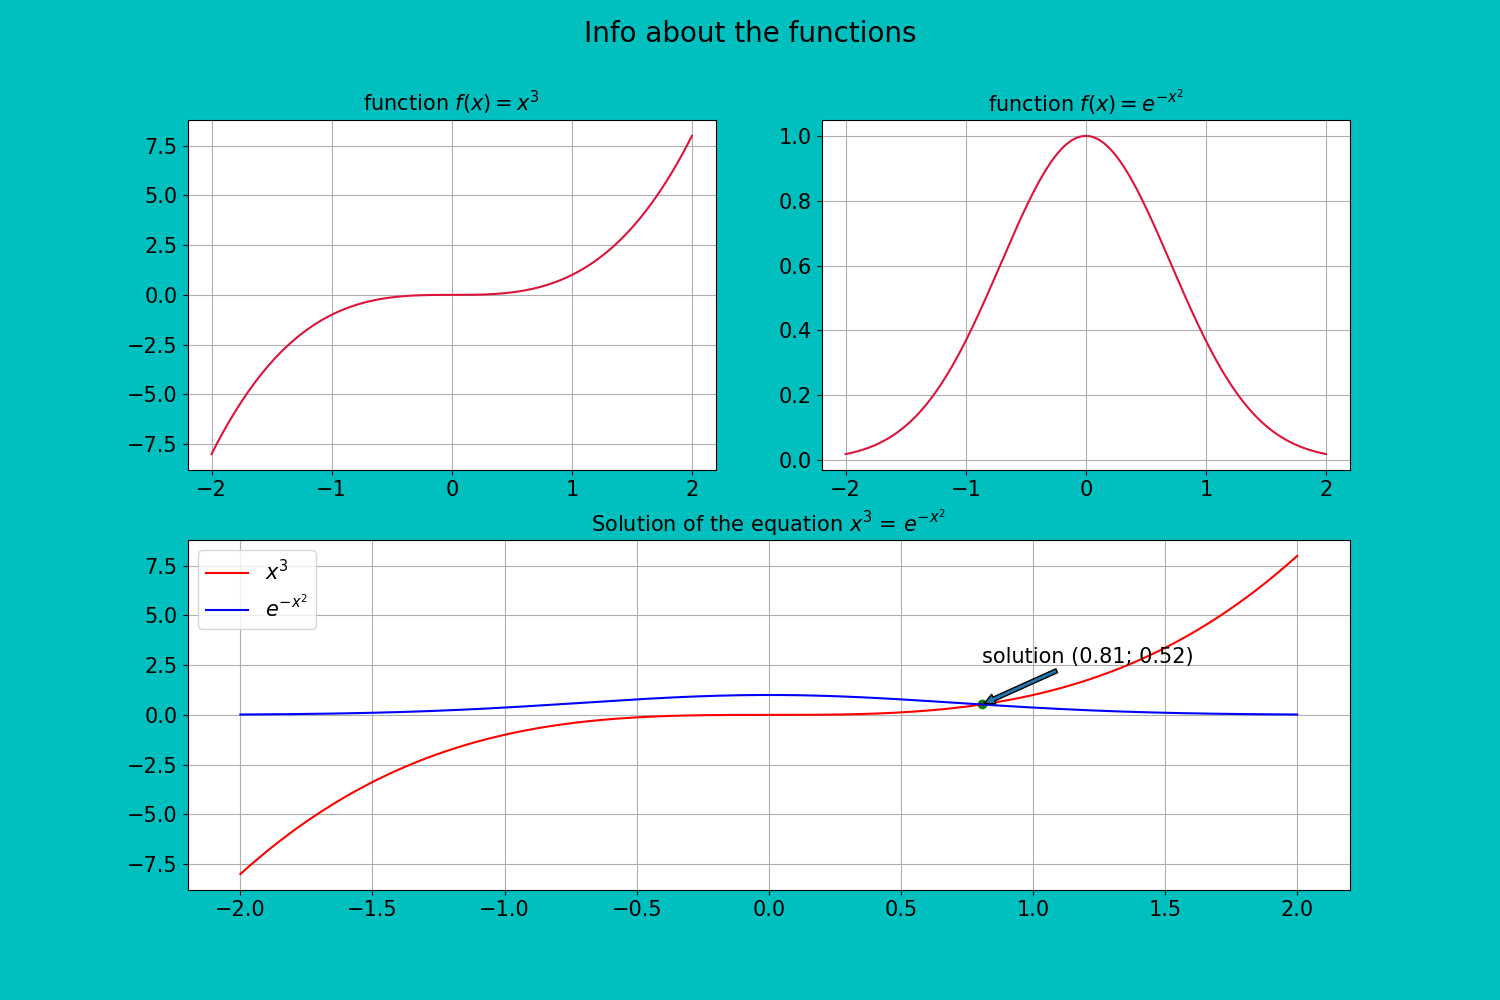

Фигура создана: Figure(1500x1000)
Оси в фигуре до создания: []
Оси в фигуре после создания: [<Axes: >, <Axes: >, <Axes: >]
Проверка перед сохранением:
Фигура: Figure(1500x1000)
Количество осей: 3
Ось 0: Axes(0.125,0.53;0.352273x0.35)
Ось 1: Axes(0.547727,0.53;0.352273x0.35)
Ось 2: Axes(0.125,0.11;0.775x0.35)
График сохранен в hw1_solution.png


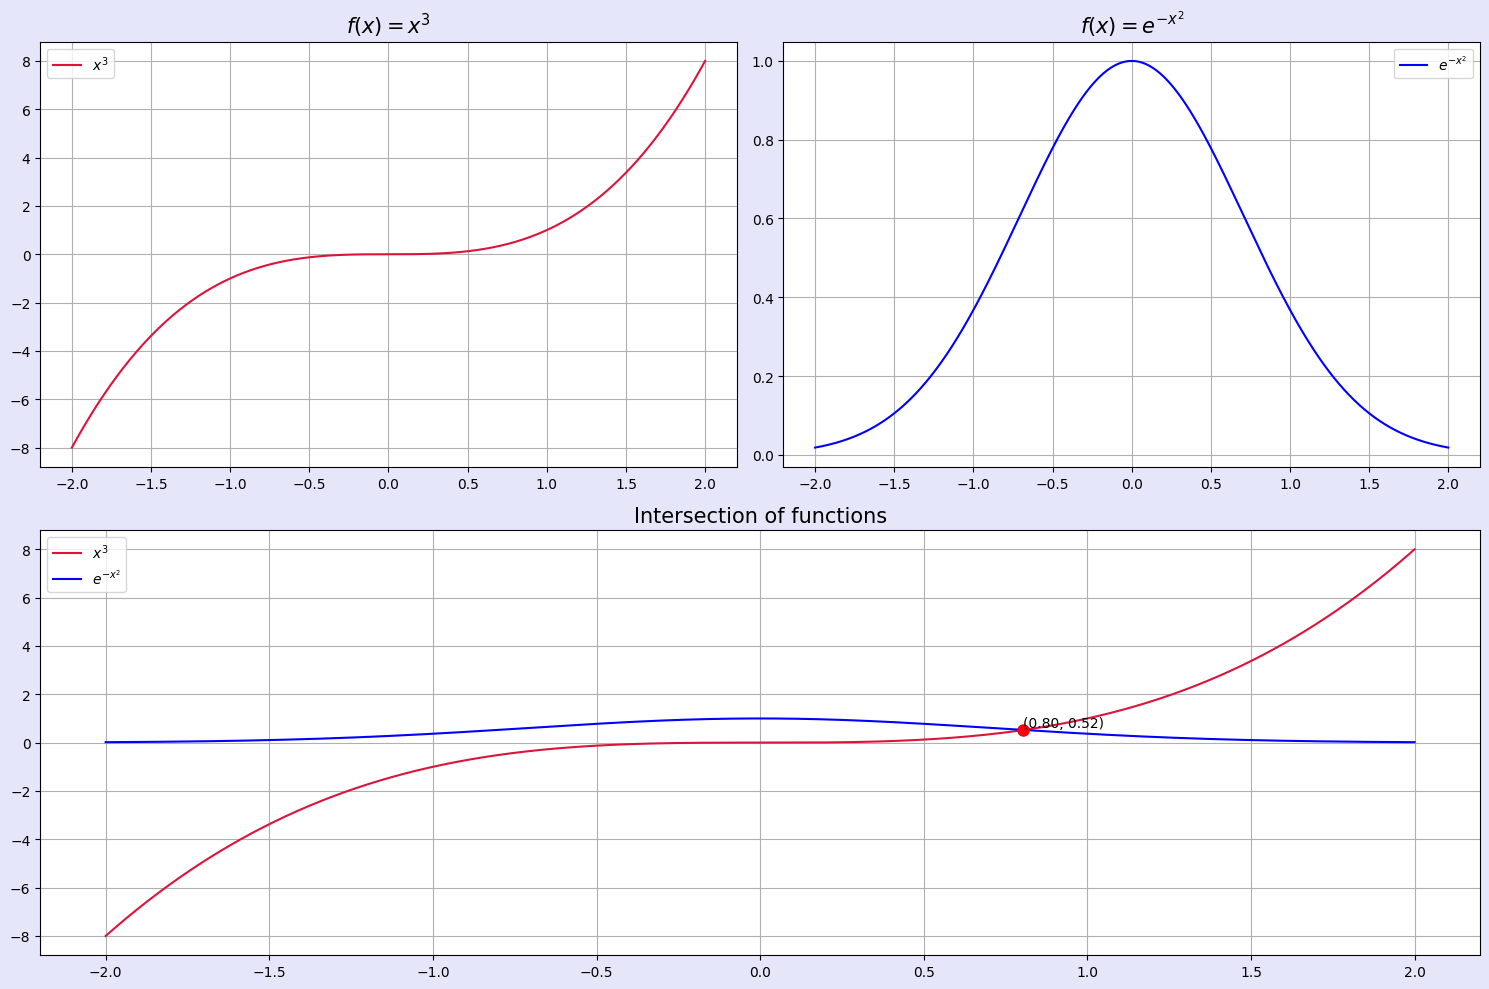

In [15]:

# 1. Создаем фигуру вручную с явным указанием осей
fig = plt.figure(figsize=(15, 10), facecolor='lavender')
print(f"Фигура создана: {fig}")

# Проверяем, есть ли оси в фигуре
print(f"Оси в фигуре до создания: {fig.axes}")

# 2. Создаем сетку и подграфики
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])  # Верхний левый
ax2 = fig.add_subplot(gs[0, 1])  # Верхний правый
ax3 = fig.add_subplot(gs[1, :])  # Нижний объединенный

print(f"Оси в фигуре после создания: {fig.axes}")

# 3. Генерируем данные
X = np.linspace(-2, 2, 1000)
y1 = X**3
y2 = np.exp(-X**2)

# 4. Рисуем верхний левый график (x^3)
ax1.plot(X, y1, color='crimson', label=r'$x^3$')
ax1.set_title(r'$f(x) = x^3$', fontsize=15)
ax1.grid(True)
ax1.legend()

# 5. Рисуем верхний правый график (e^{-x^2})
ax2.plot(X, y2, color='blue', label=r'$e^{-x^2}$')
ax2.set_title(r'$f(x) = e^{-x^2}$', fontsize=15)
ax2.grid(True)
ax2.legend()

# 6. Рисуем нижний объединенный график
ax3.plot(X, y1, color='crimson', label=r'$x^3$')
ax3.plot(X, y2, color='blue', label=r'$e^{-x^2}$')
ax3.set_title('Intersection of functions', fontsize=15)
ax3.grid(True)
ax3.legend()

# 7. Находим и отмечаем точки пересечения
diff = y1 - y2
crossings = np.where(np.diff(np.sign(diff)))[0]
for idx in crossings:
    x_cross = X[idx]
    y_cross = y1[idx]
    ax3.plot(x_cross, y_cross, 'ro', markersize=8)
    ax3.text(x_cross, y_cross, f'({x_cross:.2f}, {y_cross:.2f})', 
            fontsize=10, verticalalignment='bottom')

# 8. Проверка перед сохранением
print("Проверка перед сохранением:")
print(f"Фигура: {fig}")
print(f"Количество осей: {len(fig.axes)}")
for i, ax in enumerate(fig.axes):
    print(f"Ось {i}: {ax}")

# 9. Сохраняем и показываем
plt.tight_layout()
plt.savefig("hw1_solution.png", dpi=300, bbox_inches='tight')
print("График сохранен в hw1_solution.png")


## Результат домашнего задания

Решение для каждого задания предоставляется в виде программного кода на языке Python.

## Критерии оценивания

К1 - за каждое правильно решенное задание +1 балла
К2 - за выполнение 4 и 5 задания по +2 бала

Максимальное количество баллов —  7 балла.

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 3 балла.